# Tarea 12

## Modificiaciones del método de Euler.
#### Ejercicio 1: Implementar método implicito de Euler.

In [9]:
function derivada_simetrica(f,x0,h)
    D = (f(x0+h)-f(x0-h))./(2*h) #Definamos la derivada simetrica con la formula de recurrencia.
    return D                        
end

derivada_simetrica (generic function with 1 method)

In [10]:
function método_newton(g,x0,h) #Definamos la función de aproximacion de Newton como g(x)=x-f(x,t_1)h.
    dg(z) = derivada_simetrica(g,z,h) #Aplicando para la función g, x0 y h.
    x = x0;                            
    for i in 1:10                     
        x = x-g(x)/dg(x) #Usamos la fórmula de recurrencia del método deNewton. 
    end
    return x                          
end

método_newton (generic function with 1 method)

In [11]:
function fijo(f,x0)
    x = x0         
    for i in 1:20
        x = f(x) # Iteramos para aproximar el punto fijo.
    end
    return x      
end

fijo (generic function with 1 method)

In [12]:
function EulerImplicito(f,x0,listt,metodo)
    n = length(listt)   # N° elementos de la lista listt.
    listx = zeros(n)                   
    listx[1] = x0       #Colocamos la condición inicial x=x0.
    h = listt[2]-listt[1]                
    for k in 1:n-1
        xk = listx[k]                    
        t = listt[k+1]                  
        if metodo == "newton"
            g(z) = z - xk - h*f(z,t)     #g es la función a la que queremos encontrar su raíz x_(k+1).
            listx[k+1] = método_newton(g,xk,h)  
        elseif metodo == "fijo"
            G(z) = xk + h*f(z,t)
            listx[k+1] = fijo(G,xk)     
       
        end
    end
    return listx                         
end

EulerImplicito (generic function with 1 method)

#### __Ejercicio 2:__ Implementar Euler: Regla del punto medio.

In [13]:
function Punto_Medio(f,listt,inicial)
    h=listt[2]-listt[1] #Esta es a distancia entre las primeras dos entradas.
    listx=zeros(length(listt)) #Misma longitud de las listas.
    listx[1]=inicial #Apliquemos las iteraciones dada la condición de recurrencia.
        for i in 1:length(listt)-1
           listx[i+1]= listx[i]+h*f(listx[i]+(h/2)*f(listx[i],listt[i]),listt[i]+h/2)
        end 
    return listx #Pedimos que regrese los resultados.
end

Punto_Medio (generic function with 1 method)

#### Ejercicio 3: Implementar método de Runge-Kutta de orden 4.

###### Runge-Kutta orden 4
Éste es el método más común de la familia de métodos Runge-Kutta, para obtenerlo utilizamos también la regla de Simpson para la integral, sin embargo en esta ocasión se hicieron otras combinaciones de métodos para cacular los coeficientes $k$, de tal forma que el error en cada paso al comparar con el método de Taylor es de orden $h^5$, por lo tanto el error global es del orden $h^4$. El método se escribe como sigue:
$$ x_{n+1}=x_n+\frac{h}{6}\left( k_1+2 k_2+2 k_3 +k_4 \right),$$
donde:
\begin{align*}
k_1&=f(t_n,x_n),\\
k_2&=f(t_{n+1/2},x_n+\frac{h}{2}k_1),\\
k_3&=f(t_{n+1/2},x_n+\frac{h}{2}k_2),\\
k_4&=f(t_n,x_n+h k_3).\\
\end{align*}

In [63]:
function RK_4(f,x0,listt)
     n = length(listt)                             #n elementos de la lista listt. 
    listx = zeros(n) 
    listx[1] = x0                                      #x=x0 es la condicion inicial.
    l = (listt[2]-listt[1])/2                        #l es la mitad del paso h                                 
    for i in 1:n-1
        k1 = f(listx[i],listt[i])                 #Definamos los valores de ki.
        k2 = f(listx[i]+l*k1,listt[i]+l)
        k3 = f(listx[i]+l*k2,listt[i]+l)
        k4 = f(listx[i]+2l*k3,listt[i]+2l)
        listx[i+1] = listx[i]+(l/3.0)*(k1+2k2+2k3+k4)  #Fórmula de recurrencia de Runge-Kutta de orden 4.
    end
    return listx
end

RK_4 (generic function with 1 method)

#### Ejercicio 4: Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito.

El ejercicio de la anterior tarea resolvimos 
$$\frac{dx}{dt}=-2.5x, \: x_{0}=x(0)=1\text{ y }2, \text{ y } t\in(0,8),$$
con valores de $h=1.0,0.5,0.2,0.01$. Y su solución es:
$$x(t)=x_{0}e^{-2.5t}.$$
Ahora usando Euler implicito para resolver cuando $x(0)=1$.

In [15]:
f(x,t)=-2.5x

f (generic function with 1 method)

In [16]:
using PyPlot

In [17]:
listt1=0:0.5:8                    #Lista entre el intervalo (0,8) con h=0.5.
listt2=0:0.2:8                    #Lista entre el intervalo (0,8) con h=0.2.
listt3=0:0.01:8                   #Lista entre el intervalo (0,8) con h=0.01.
listt4=0:0.0001:8                 #Lista entre el intervalo (0,8) con h=0.0001.
       
E1=EulerImplicito(f,1,listt1,"newton")  #x0=1 para cada S1N.
E2=EulerImplicito(f,1,listt2,"newton")
E3=EulerImplicito(f,1,listt3,"newton")
E4=EulerImplicito(f,1,listt4,"newton")

80001-element Array{Float64,1}:
 1.0       
 0.99975   
 0.9995    
 0.99925   
 0.999001  
 0.998751  
 0.998501  
 0.998252  
 0.998002  
 0.997753  
 0.997503  
 0.997254  
 0.997005  
 ⋮         
 2.072e-9  
 2.07148e-9
 2.07097e-9
 2.07045e-9
 2.06993e-9
 2.06941e-9
 2.0689e-9 
 2.06838e-9
 2.06786e-9
 2.06735e-9
 2.06683e-9
 2.06631e-9

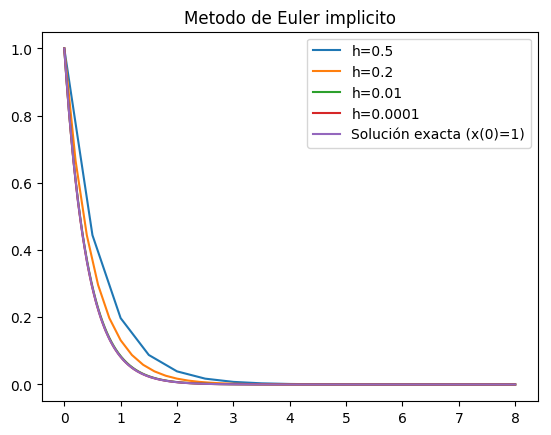

PyObject <matplotlib.legend.Legend object at 0x7fa838d497d0>

In [20]:
title("Metodo de Euler implicito")
plot(listt1,E1,label="h=0.5")
plot(listt2,E2,label="h=0.2")
plot(listt3,E3,label="h=0.01")
plot(listt4,E4,label="h=0.0001")
t=linspace(0,8,100)
plot(t,exp.(-2.5*t),label="Solución exacta (x(0)=1)")
legend()

#### __Ejercicio 5__: Usar el método del punto medio y de Runge-Kutta para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$. __Nota: Este es el test para el de Runge-Kutta.__

In [26]:
h(x,t)=(2x-18t)/(1+t) #Definamos la función.
#Consideremos los siguientes espacios temporales
list1=0:0.5:12 #t=0.5
list2=0:0.2:12 #t=0.2
list3=0:0.01:12 #t=0.1
list4=0:0.001:12 #t=0.001

PM1=Punto_Medio(h,lista1,4.0) #Usando la lista de arriba (con cada h diferente) apliquemos el método del punto medio considerando x(0)=4.0
PM2=Punto_Medio(h,lista2,4.0)
PM3=Punto_Medio(h,lista3,4.0)
PM4=Punto_Medio(h,lista4,4.0)

12001-element Array{Float64,1}:
    4.0    
    4.008  
    4.01598
    4.02396
    4.03192
    4.03988
    4.04782
    4.05576
    4.06368
    4.0716 
    4.0795 
    4.0874 
    4.09528
    ⋮      
 -618.768  
 -618.88   
 -618.992  
 -619.104  
 -619.216  
 -619.328  
 -619.44   
 -619.552  
 -619.664  
 -619.776  
 -619.888  
 -620.0    

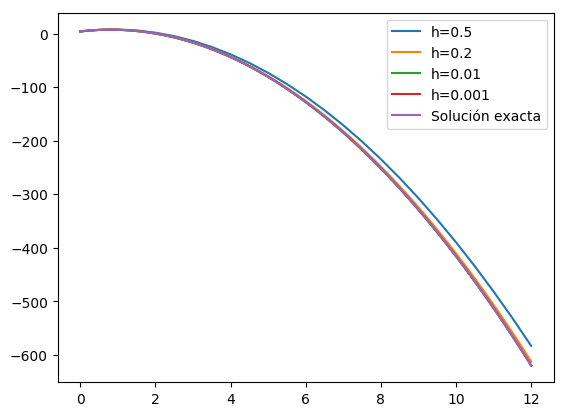

PyObject <matplotlib.legend.Legend object at 0x7fa8388f8350>

In [27]:
plot(list1,PM1,label="h=0.5") ## Grafiquemos las soluciones
plot(list2,PM2,label="h=0.2")
plot(list3,PM3,label="h=0.01")
plot(list4,PM4,label="h=0.001")
list=linspace(0,12,100)
plot(list,4+8*list-5*list.^(2),label="Solución exacta")
legend()

#### __Ejercicio 6__: Grafique la energía total del oscilador harmonico usando los métodos explícito de Euler y Runge-Kutta de orden 4. Compare sus respuestas y discuta.

__Nota:__ Deberán hacer una implementación de Runge-Kutta para dos dimensiones (o de una vez más si quieren, basandose en el ejemplo que les di, si se les ocurre una mánera mejor, adelante).

__Nota:__ Usen $h=0.1$ para hacer la comparación o cualquier otro que refleje una diferencia significativa entre los dos métodos en la energía, el chiste es no usar un $h$ muy pequeño.

In [28]:
function euler(f,list,x0) #Método explícit0 de Euler para varias variables
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

euler (generic function with 1 method)

In [30]:
l(x,t)=[x[2], -1.0*x[1]] #Se define la función para resolver con k=1 y m=1, que surge de resolver d2x/dt2=x.

l (generic function with 1 method)

In [31]:
list=0:0.1:8 #Se graficará sobre el intervalo [0,8] con h = 0.1
vec=euler(l,list,[0,2]) #En vec se guardan las soluciones con Euler y se dan como condiciones iniciales x(0)=0 y u(0)=2

listx1euler=map(x->x[1],vec) #Se guardan las soluciones en dos lists y la solución teórica en listxreal
listx2euler=map(x->x[2],vec)
listxreal=2*sin.(list)
listxdotreal=2*cos.(list)

81-element Array{Float64,1}:
  2.0      
  1.99001  
  1.96013  
  1.91067  
  1.84212  
  1.75517  
  1.65067  
  1.52968  
  1.39341  
  1.24322  
  1.0806   
  0.907192 
  0.724716 
  ⋮        
  1.63145  
  1.5078   
  1.36909  
  1.2167   
  1.05216  
  0.877095 
  0.693271 
  0.50252  
  0.306748 
  0.107911 
 -0.0920043
 -0.291    

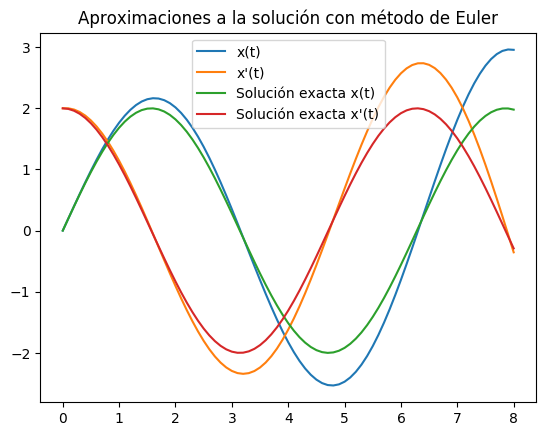

PyObject <matplotlib.legend.Legend object at 0x7fa838375310>

In [38]:
title("Aproximaciones a la solución con método de Euler")
plot(list,listx1euler, label="x(t)");
plot(list,listx2euler, label="x'(t)");
plot(list,listxreal, label="Solución exacta x(t)")
plot(list,listxdotreal, label="Solución exacta x'(t)")
legend()

In [29]:
function RK4(f,listt,x0)
     x = x0
     l = (listt[2]-listt[1])/2.0
     listx=[]
     push!(listx,x)
     for i in 2:length(listt)
        t = listt[i]
        k1 = f(x,t)
        k2 = f(x+l*k1,t+l)
        k3 = f(x+l*k2,t+l)
        k4 = f(x+2l*k3,t+2l)
        x += (l/3.0)*(k1+2k2+2k3+k4)
        push!(listx,x) 
     end
     return listx
end

RK4 (generic function with 1 method)

In [40]:
list=0:0.1:8 #Se graficará sobre el intervalo [0,8] con h = 0.1.

#En vec se guardan las soluciones con Runge-Kutta y se dan como condiciones iniciales x(0)=0 y u(0)=2
vec=RK4(l,list,[0,2])

listx1rk=map(x->x[1],vec) #Se guardan las soluciones en dos lists y la solución teórica en listxreal
listx2rk=map(x->x[2],vec)
listxreal=2*sin.(list)
listxdotreal=2*cos.(list)

81-element Array{Float64,1}:
  2.0      
  1.99001  
  1.96013  
  1.91067  
  1.84212  
  1.75517  
  1.65067  
  1.52968  
  1.39341  
  1.24322  
  1.0806   
  0.907192 
  0.724716 
  ⋮        
  1.63145  
  1.5078   
  1.36909  
  1.2167   
  1.05216  
  0.877095 
  0.693271 
  0.50252  
  0.306748 
  0.107911 
 -0.0920043
 -0.291    

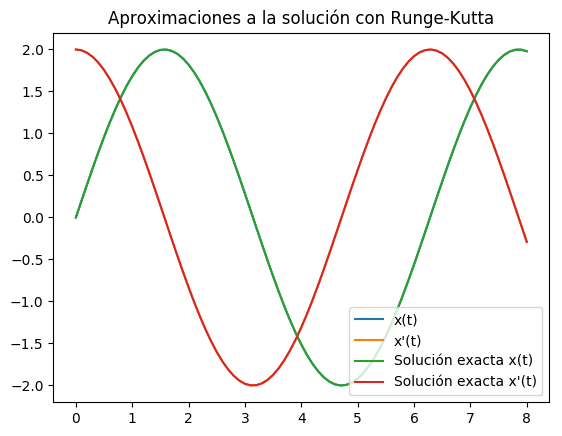

PyObject <matplotlib.legend.Legend object at 0x7fa83825ea50>

In [41]:
title("Aproximaciones a la solución con Runge-Kutta")
plot(list,listx1rk, label="x(t)");
plot(list,listx2rk, label="x'(t)");
plot(list,listxreal, label="Solución exacta x(t)");
plot(list,listxdotreal, label="Solución exacta x'(t)");
legend()

Visto en Mecanica Vectorial, la energia del oscilador armónico es:
$$E=\frac{1}{2}m\dot{x}^{2}(t)+\frac{1}{2}kx^{2}(t),$$
entonces usando los valores presentados, $m=1\:\mathrm{kg}$ y $k=4$ $E=\displaystyle\frac{61}{2}\:\mathrm{J}$.
Con el método de Euler:

In [42]:
function Energia(x,y) #En esta función se evaluarán las soluciones numéricas tal que E=0.5*x^2+0.5x'^2
    return 0.5*x*x+0.5y*y
end

function c(x,t) #La energía teórica es constante y es E=0.5*x^2+0.5x'^2, ya que m=k=1. Encontramos entonces que E=2
    return 2
end

c (generic function with 1 method)

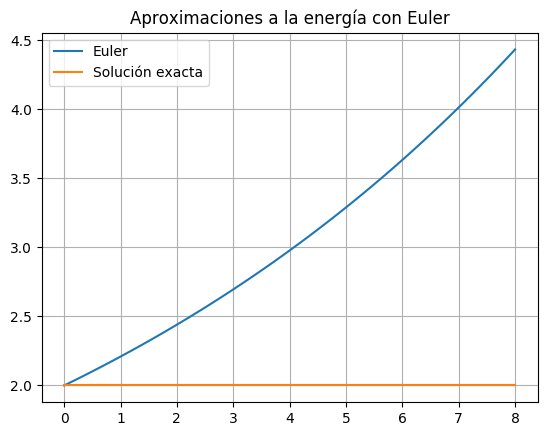

PyObject <matplotlib.legend.Legend object at 0x7fa83863cb10>

In [46]:
title("Aproximaciones a la energía con Euler")
grid("on")
plot(list,Energia.(listx1euler, listx2euler), label="Euler")
plot(list,c.(list,list), label="Solución exacta")
legend()

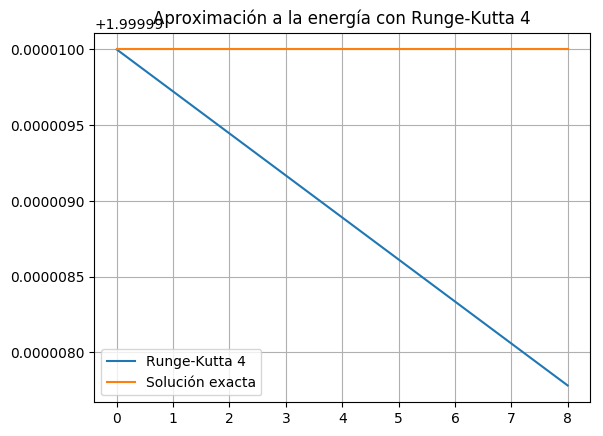

PyObject <matplotlib.legend.Legend object at 0x7fa837f017d0>

In [49]:
title("Aproximación a la energía con Runge-Kutta 4")
grid("on")
plot(list,Energia.(listx1rk, listx2rk), label="Runge-Kutta 4")
plot(list,c.(list,list), label="Solución exacta")
legend()

#### __Ejercicio 7:__ Utilizando los métodos de Euler y Runge-Kutta con $h=0.01$ y una condición inicial, grafique las dos trayectorias en el espacio $(x,v)$ (esto casi es el espacio de fase en la mécanica clásica, para ello se necesitaria graficar $(x,p)$. 
__Nota:__ Si ya tiene una forma de calcular $x$ y $v$ en forma de listas, digamos `listx` y `listv`, bastará con hacer `plot(listx,listv)`.

In [53]:
list=0:0.01:100 #Se utilizará el intervalo [0,100] con h = 0.01
vec=euler(l,list,[0,2]) #En vec se guardan las soluciones con Euler y se dan como condiciones iniciales x(0)=0 y u(0)=2

listx1euler=map(x->x[1],vec) #Se guardan las soluciones en dos lists y la solución teórica en listxreal
listx2euler=map(x->x[2],vec)
listxreal=2*sin.(list)
listxdotreal=2*cos.(list)

10001-element Array{Float64,1}:
 2.0    
 1.9999 
 1.9996 
 1.9991 
 1.9984 
 1.9975 
 1.9964 
 1.9951 
 1.9936 
 1.99191
 1.99001
 1.98791
 1.98562
 ⋮      
 1.60304
 1.61492
 1.62663
 1.63819
 1.64958
 1.66081
 1.67187
 1.68276
 1.69348
 1.70404
 1.71442
 1.72464

In [55]:
list=0:0.01:100 #Se utilizará el intervalo [0,100] con h = 0.01
vec=RK4(l,list,[0,2]) #En vec se guardan las soluciones con Runge-Kutta y se dan como condiciones iniciales x(0)=0 y u(0)=2

listx1rk=map(x->x[1],vec);
#Se guardan las soluciones en dos lists y la solución teórica en listxreal
listx2rk=map(x->x[2],vec)
listxreal=2*sin.(list)
listxdotreal=2*cos.(list)

10001-element Array{Float64,1}:
 2.0    
 1.9999 
 1.9996 
 1.9991 
 1.9984 
 1.9975 
 1.9964 
 1.9951 
 1.9936 
 1.99191
 1.99001
 1.98791
 1.98562
 ⋮      
 1.60304
 1.61492
 1.62663
 1.63819
 1.64958
 1.66081
 1.67187
 1.68276
 1.69348
 1.70404
 1.71442
 1.72464

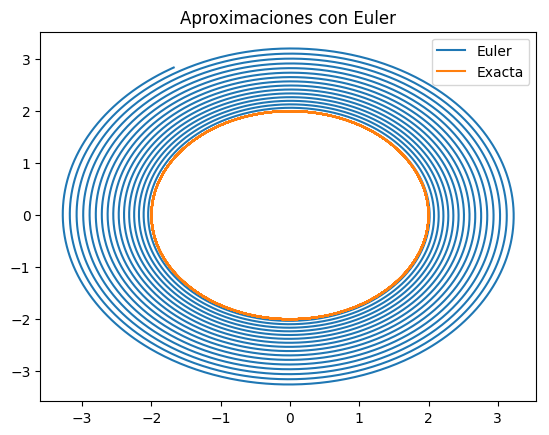

PyObject <matplotlib.legend.Legend object at 0x7fa833cbd7d0>

In [57]:
title("Aproximaciones con Euler")
plot(listx1euler,listx2euler, label="Euler")
plot(listxreal,listxdotreal, label="Exacta")
legend()

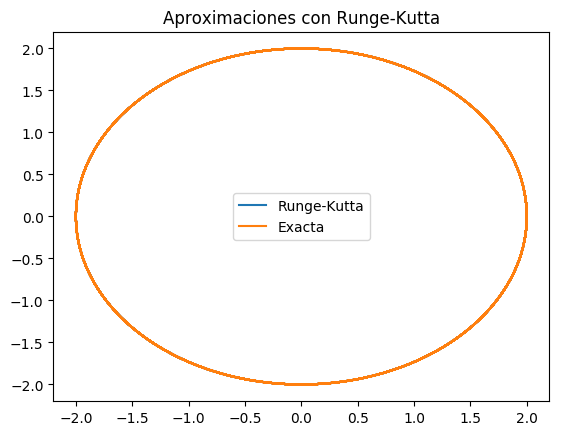

PyObject <matplotlib.legend.Legend object at 0x7fa833c15c90>

In [58]:
title("Aproximaciones con Runge-Kutta")
plot(listx1rk,listx2rk, label="Runge-Kutta")
plot(listxreal,listxdotreal, label="Exacta")
legend()

#### Ejercicio 8: Utilizando solo Runge-Kutta, grafique muchas condiciones iniciales del oscilador armónico en el espacio de fase. Tome todos los parámetros como prefiera, revisando que obtiene el resultado esperado.

In [59]:
f(x,t)=[x[2],-4*x[1]];  #Tomemos a k=4.

In [67]:
listt_RK4=0:0.01:pi;                               # Paso h=0.01
listx_RK121=map(x->x[1],RK4(f,listt_RK4,[1,2]));  # Solución x(t) para x(0)=1 y v(0)=2
listx_RK122=map(x->x[2],RK4(f,listt_RK4,[1,2]));  # Solución v(t) para x(0)=1 y v(0)=2
listx_RK111=map(x->x[1],RK4(f,listt_RK4,[1,1]));  # Solución x(t) para x(0)=1 y v(0)=1
listx_RK112=map(x->x[2],RK4(f,listt_RK4,[1,1]));  # Solución v(t) para x(0)=1 y v(0)=1
listx_RK281=map(x->x[1],RK4(f,listt_RK4,[2,8]));  # Solución x(t) para x(0)=2 y v(0)=8
listx_RK282=map(x->x[2],RK4(f,listt_RK4,[2,8]));  # Solución v(t) para x(0)=2 y v(0)=8
listx_RK931=map(x->x[1],RK4(f,listt_RK4,[9,3]));  # Solución x(t) para x(0)=9 y v(0)=3
listx_RK932=map(x->x[2],RK4(f,listt_RK4,[9,3]));  # Solución v(t) para x(0)=9 y v(0)=3
listx_RK571=map(x->x[1],RK4(f,listt_RK4,[5,7]));  # Solución x(t) para x(0)=5 y v(0)=7
listx_RK572=map(x->x[2],RK4(f,listt_RK4,[5,7]));  # Solución v(t) para x(0)=5 y v(0)=7
listx_RK381=map(x->x[1],RK4(f,listt_RK4,[3,8]));  # Solución x(t) para x(0)=3 y v(0)=8
listx_RK382=map(x->x[2],RK4(f,listt_RK4,[3,8]));  # Solución v(t) para x(0)=3 y v(0)=8

#Aqui aplicamos diferentes condiciones iniciales.

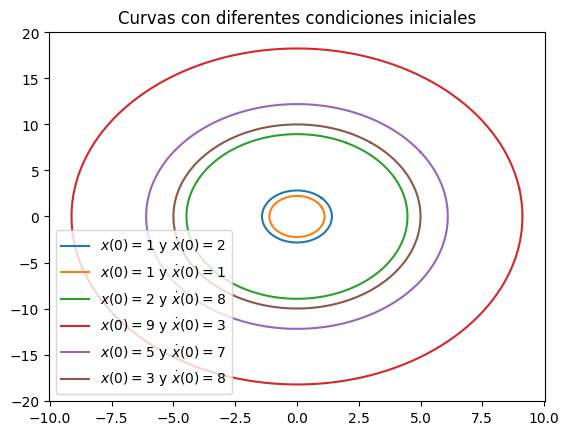

PyObject <matplotlib.legend.Legend object at 0x7fa8380cd650>

In [68]:
title("Curvas con diferentes condiciones iniciales")
plot(listx_RK121,listx_RK122,label=L"$x(0)=1$ y $\dot{x}(0)=2$");
plot(listx_RK111,listx_RK112,label=L"$x(0)=1$ y $\dot{x}(0)=1$");
plot(listx_RK281,listx_RK282,label=L"$x(0)=2$ y $\dot{x}(0)=8$");
plot(listx_RK931,listx_RK932,label=L"$x(0)=9$ y $\dot{x}(0)=3$");
plot(listx_RK571,listx_RK572,label=L"$x(0)=5$ y $\dot{x}(0)=7$");
plot(listx_RK381,listx_RK382,label=L"$x(0)=3$ y $\dot{x}(0)=8$");
legend()